# End Sem Lab Exam

### CS22B1093 Rohan G

### Q1 - TD(0) Policy Evaluation in GridWorld

---------------------

Initial Grid Structure (Value Function):
  0.00   0.00   0.00   0.00
  0.00   0.00   0.00   0.00
  0.00   0.00   0.00   0.00
  0.00   0.00   0.00   0.00


Episode 1 start state: 10
  Terminated at state 0 after 14 steps.
Episode 2 start state: 14
  Terminated at state 15 after 24 steps.
Episode 3 start state: 3
  Terminated at state 0 after 21 steps.
Episode 4 start state: 2
  Terminated at state 0 after 7 steps.
Episode 5 start state: 3
  Terminated at state 15 after 13 steps.
Episode 6 start state: 3
  Terminated at state 0 after 35 steps.
Episode 7 start state: 9
  Terminated at state 0 after 21 steps.
Episode 8 start state: 7
  Terminated at state 0 after 10 steps.
Episode 9 start state: 2
  Terminated at state 15 after 7 steps.
Episode 10 start state: 6
  Terminated at state 15 after 38 steps.
Episode 11 start state: 13
  Terminated at state 0 after 13 steps.
Episode 12 start state: 11
  Terminated at state 15 after 17 steps.
Episode 13 start state: 8
  Terminated at state 15 afte

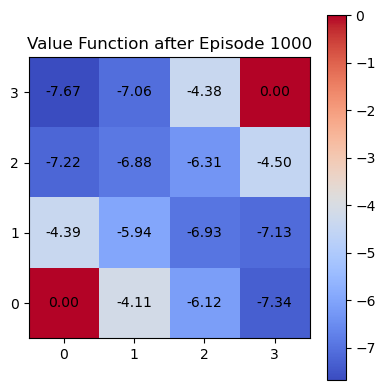


Value Table after Episode 2000:
 -7.39  -6.78  -5.02   0.00
 -6.86  -6.89  -6.04  -3.30
 -3.54  -6.08  -6.69  -6.54
  0.00  -5.88  -7.10  -7.36


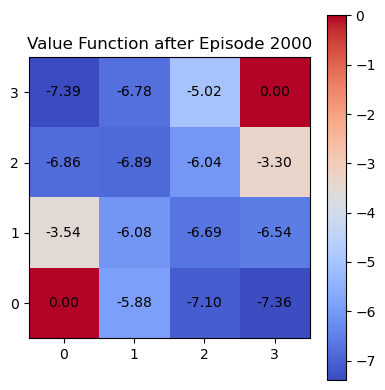


Value Table after Episode 3000:
 -7.66  -6.56  -3.28   0.00
 -7.32  -6.62  -5.34  -3.67
 -4.01  -5.87  -6.55  -6.07
  0.00  -4.18  -6.78  -7.53


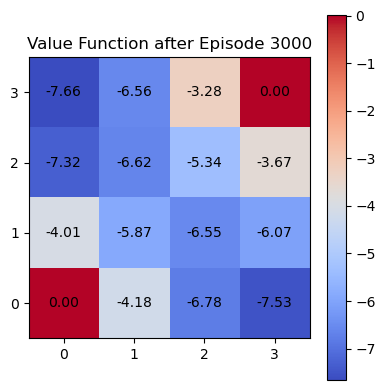


Value Table after Episode 4000:
 -7.41  -6.85  -4.89   0.00
 -6.44  -6.74  -6.83  -6.54
 -4.33  -5.94  -7.25  -7.64
  0.00  -3.93  -6.60  -7.84


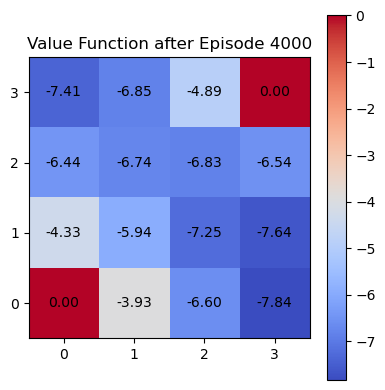


Value Table after Episode 5000:
 -7.27  -6.23  -3.55   0.00
 -6.84  -6.83  -6.08  -4.19
 -5.57  -6.34  -6.81  -6.73
  0.00  -4.54  -6.35  -7.23


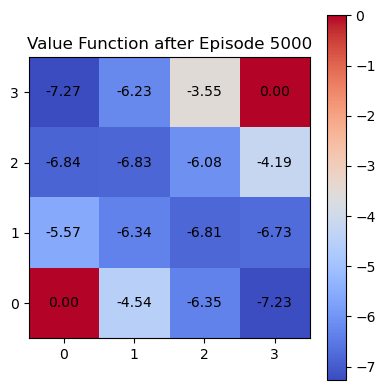


Value Table after Episode 6000:
 -7.32  -6.40  -4.05   0.00
 -6.46  -6.66  -6.55  -4.33
 -3.60  -6.11  -6.66  -6.65
  0.00  -3.94  -6.64  -7.49


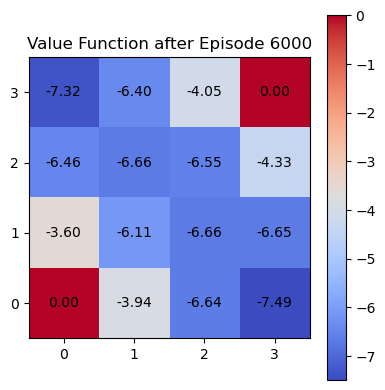


Value Table after Episode 7000:
 -7.46  -7.24  -5.37   0.00
 -6.76  -6.96  -6.09  -3.20
 -6.12  -6.13  -6.82  -6.35
  0.00  -4.53  -6.58  -7.40


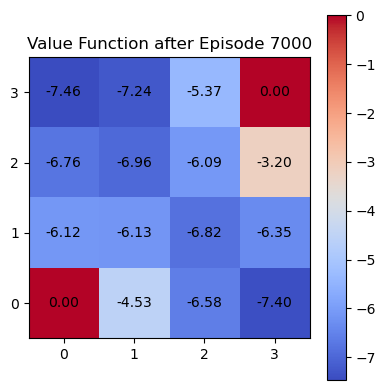


Value Table after Episode 8000:
 -6.55  -5.49  -4.11   0.00
 -6.51  -6.14  -5.30  -3.34
 -3.86  -5.77  -6.19  -6.10
  0.00  -4.48  -6.09  -6.80


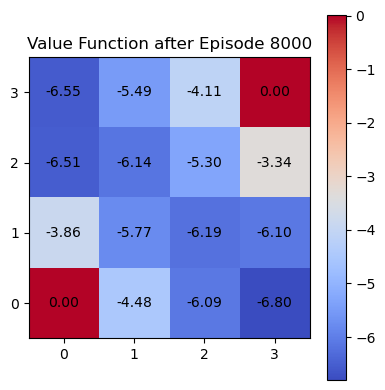


Value Table after Episode 9000:
 -7.62  -7.32  -3.58   0.00
 -7.08  -6.94  -6.06  -4.98
 -3.68  -5.58  -6.78  -6.53
  0.00  -3.61  -6.72  -7.15


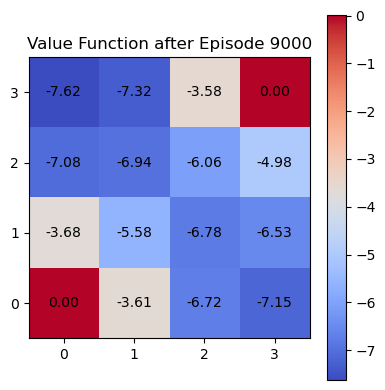


Value Table after Episode 10000:
 -7.45  -6.70  -5.17   0.00
 -6.97  -6.90  -6.20  -3.40
 -4.92  -6.45  -6.92  -6.98
  0.00  -5.49  -6.66  -7.30


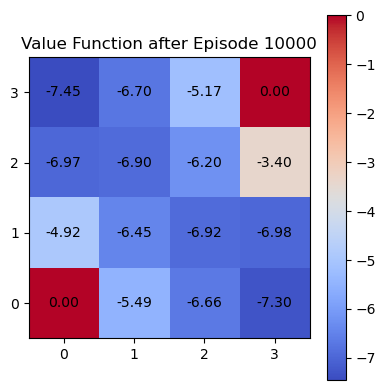

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import gymnasium as gym
from gymnasium import spaces

# Defining the GridWorld environment
class GridWorldEnv(gym.Env):
    def __init__(self, size=4):
        self.size = size
        self.observation_space = spaces.Discrete(size * size)
        self.action_space = spaces.Discrete(4)  # 0: up, 1: down, 2: left, 3: right
        self.terminal_states = [0, size * size - 1]
        self.rewards = np.full((size * size), -1, dtype=float)
        self.rewards[0] = 0
        self.rewards[size * size - 1] = 0
        self.state = None

    def _to_coords(self, s):
        return s // self.size, s % self.size

    def _to_state(self, i, j):
        return i * self.size + j

    def reset(self, seed=None, options=None):
        super().reset(seed=seed)
        valid_states = [s for s in range(self.size * self.size) if s not in self.terminal_states]
        self.state = self.np_random.choice(valid_states)
        return self.state, {}

    def step(self, action):
        i, j = self._to_coords(self.state)
        if action == 0:  # up
            i = max(i - 1, 0)
        elif action == 1:  # down
            i = min(i + 1, self.size - 1)
        elif action == 2:  # left
            j = max(j - 1, 0)
        elif action == 3:  # right
            j = min(j + 1, self.size - 1)
        next_state = self._to_state(i, j)
        reward = self.rewards[next_state]
        terminated = next_state in self.terminal_states
        self.state = next_state
        return next_state, reward, terminated, False, {}

def random_policy(state, action_space):
    return np.random.choice(action_space.n)

# TD(0) policy evaluation
def evaluate_policy(env, gamma=0.9, alpha=0.1, num_episodes=1000):
    V = np.zeros(env.observation_space.n)
    value_snapshots = []

    for episode in range(num_episodes):
        state, _ = env.reset()
        while state in env.terminal_states:
            state, _ = env.reset()
        print(f"Episode {episode+1} start state: {state}")
        step_count = 0
        while True:
            action = random_policy(state, env.action_space)
            next_state, reward, terminated, _, _ = env.step(action)
            td_target = reward + gamma * V[next_state]
            td_error = td_target - V[state]
            V[state] += alpha * td_error
            step_count += 1
            if terminated:
                print(f"  Terminated at state {next_state} after {step_count} steps.")
                break
            state = next_state
        if (episode + 1) % 1000 == 0:
            print(f"\nValue function after {episode+1} episodes:")
            print(V.reshape(env.size, env.size))
            value_snapshots.append(V.reshape(env.size, env.size).copy())
    return value_snapshots

# Plot value function over iterations
def plot_value_function_snapshots(snapshots):
    for idx, V_snapshot in enumerate(snapshots):
        print(f"\nValue Table after Episode {(idx+1)*1000}:")
        for row in V_snapshot[::-1]:
            print(" ".join(f"{v:6.2f}" for v in row))
        plt.figure(figsize=(4, 4))
        plt.imshow(V_snapshot, cmap='coolwarm', interpolation='none')
        plt.title(f'Value Function after Episode {(idx+1)*1000}')
        plt.colorbar()

        plt.xticks(np.arange(0, 4, 1))
        plt.yticks(np.arange(0, 4, 1))
        plt.xlim(-0.5, 3.5)
        plt.ylim(-0.5, 3.5)

        for i in range(V_snapshot.shape[0]):
            for j in range(V_snapshot.shape[1]):
                plt.text(j, i, f"{V_snapshot[i, j]:.2f}", ha='center', va='center', color='black', fontsize=10)
        plt.tight_layout()
        plt.show()

def print_initial_grid(env):
    V_init = np.zeros((env.size, env.size))
    print("Initial Grid Structure (Value Function):")
    for row in V_init[::-1]:
        print(" ".join(f"{v:6.2f}" for v in row))
    print("\n")

# Main execution
env = GridWorldEnv(size=4)
print_initial_grid(env)
snapshots = evaluate_policy(env, gamma=0.9, alpha=0.1, num_episodes=10000)
plot_value_function_snapshots(snapshots)

----------------